In [ ]:
# Hamiltonian Eigenvalues

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

$V(x) = -V_0 e^{-\alpha x^2}$

In [4]:
# declarations
n = 100
L = 5
V_0 = -5
alpha = 1
x = np.linspace(-L, L, n)
dx = (2*L)/n
V = np.zeros(n)
h = np.zeros((n, n))

# functions
def potential(x):
    return -V_0*(np.e**(-alpha*(x**2)))

# plot potential
for i in range(0, n):
    V[i] = potential(x[i])

Lowest 5 Eigenvalues:
[0.30151894639999083, 0.30188404726880586, 1.1407642956362187, 1.1443844549192248, 2.3671495422847286]


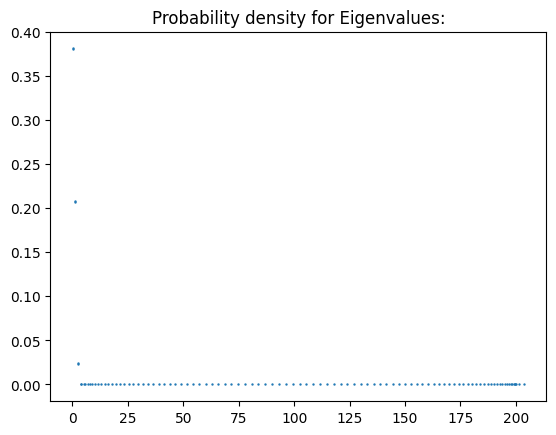

First 3 Eigenvectors:
[[-1.09737629e-06  1.29875440e-04  4.67722229e-03  1.17899971e-02
  -1.70010470e-02 -2.20978883e-02 -2.72064188e-02  3.17528566e-02
  -3.64586638e-02  4.95751446e-02  5.37865674e-02  4.52831512e-02
   5.79228728e-02  6.19804100e-02 -6.59623997e-02  6.98665454e-02
  -7.36919190e-02 -8.10981306e-02 -8.46744426e-02  8.81629158e-02
   9.15609564e-02 -9.48659226e-02  9.80751592e-02 -1.01186020e-01
   1.22228794e-01  1.19994304e-01  1.17642253e-01 -1.15174759e-01
   1.12594035e-01 -1.04195885e-01 -1.09902381e-01 -1.24343700e-01
   1.26337104e-01  1.29952265e-01  1.31570727e-01  1.33061104e-01
  -1.34422038e-01 -1.35652292e-01  1.36750749e-01 -1.37716416e-01
   1.38548426e-01  1.39808634e-01  1.40235735e-01  1.40526982e-01
   1.40682151e-01 -1.40701146e-01  1.20823205e-02  1.20959145e-02
  -1.40584005e-01 -2.25582782e-02 -2.26568795e-02 -3.05910276e-02
  -3.12614335e-02 -1.40330895e-01  1.39942116e-01 -3.84051830e-02
  -4.54162512e-02  4.72667812e-02  5.28044668e-02 -5.6

In [14]:
# generate matrix
for i in range(0, n):
    #h[i][i] = (1/(2*(dx**2)))+V[i]
    h[i][i] = (1/(dx**2))+V[i]
    if i != n-1:
        h[i][i+1] = -1/(2*(dx**2))
    if i != 0:
        h[i][i-1] = -1/(2*(dx**2))

# find eigenvalues and eigenvectors
h_eig = np.linalg.eig(h)

h_eig_sorted = sorted(h_eig[0])

# display some results
print("Lowest 5 Eigenvalues:") # should be 0.26ish
print(h_eig_sorted[0:5])

plt.title("Probability density for Eigenvalues:")
n_mesh = np.linspace(0, n, n)
plt.scatter(h_eig[0], norm.pdf(h_eig[0]), s=0.5)
plt.show()

print("First 3 Eigenvectors:")
print(h_eig[1][0:3])

In [16]:
# prof Varga

import numpy as np

import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 512
a = 1.0
x = np.linspace(-a/2.,a/2.,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to a/(N-1)
V = 0.*x
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

print(sorted(E))

[4.896383914113177, 19.58535202828455, 44.06635346515186, 78.33847011869052, 122.4004166886703, 176.25054072885834, 239.88682270898997, 313.3068760905069, 396.5079474160589, 489.4869164127669, 592.2402961092408, 704.7642329663514, 827.0545070217494, 959.1065320481241, 1100.9153557252014, 1252.4756598254685, 1413.7817604136246, 1584.8276080597402, 1765.6067880661315, 1956.1125207079272, 2156.337661487329, 2366.2747014015495, 2585.915767224419, 2815.252621801658, 3054.2766643597856, 3302.9789308286827, 3561.3500941777615, 3829.3804647657585, 4107.059990704125, 4394.378258233996, 4691.324492116743, 4997.88755603806, 5314.0559530256405, 5639.817825880294, 5975.16095762067, 6320.07277194141, 6674.540333684793, 7038.550349325845, 7412.089167470883, 7795.142779369475, 8187.696819439816, 8589.73656580747, 9001.246940857487, 9422.212511799846, 9852.617491248244, 10292.445737812153, 10741.680756702173, 11200.305700348636, 11668.30336903342, 12145.656211535017, 12632.346325786722, 13128.355459548